## Modelos de regresion lineal
### Modelo con datos simulados 
* y = a + b*x
* X : 100 valores distribuidos segun una N(1.5, 2.5)
* Ye = 2  + 0.3 * x + e // agregamos la componente de error e
* e estara distribuido según una N(0,0.8)

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 +  1.9*x

In [5]:
y_act = 5 + 1.9*x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y": y_act_list,
        "y_pred": y_pred_list
        
    }
)

In [8]:
data.head()

,x,y,y_pred
0,0.506608,5.391634,5.962556
1,-0.353262,3.765233,4.328802
2,2.705562,9.009769,10.140568
3,-0.977296,2.015362,3.143138
4,4.586240,14.208315,13.713856


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for _ in range(1,len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

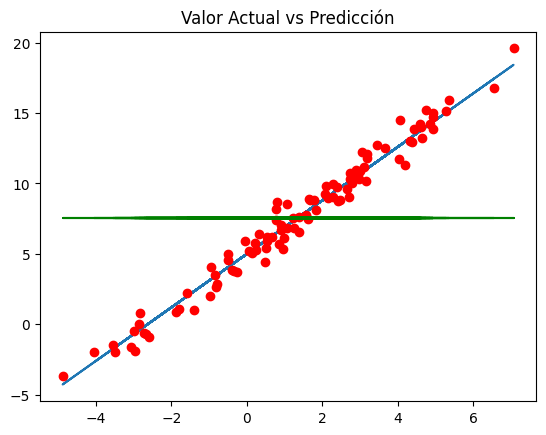

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act , 'ro')
plt.plot(x, y_mean, 'g')
plt.title("Valor Actual vs Predicción")


In [12]:
data["SSR"] = (data["y_pred"] - np.mean(y_act))**2 #Suma de cuadrados de la regresión
data["SSD"] = (data["y_pred"] - data["y"])**2 #Suma de cuadrados de la diferencia (error)
data["SST"] = (data["y"] - np.mean(y_act))**2 #Suma total de cuadrados 

In [13]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,0.506608,5.391634,5.962556,2.562888,0.325951,4.716819
1,-0.353262,3.765233,4.328802,10.463001,0.317610,14.426513
2,2.705562,9.009769,10.140568,6.641495,1.278706,2.091816
3,-0.977296,2.015362,3.143138,19.539233,1.271878,30.781369
4,4.586240,14.208315,13.713856,37.827398,0.244490,44.154125


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])


In [15]:
SSR

2302.368385224794

In [16]:
SSD #Lo que no se explica del morelo con respecto al total, tambien puede ser SST - SSR, 
#suma de los cuadrados totales menos la suma de los cuadrados de la regresión   

59.29716978884558

In [17]:
SST

2459.418633330037

In [18]:
SSR + SSD

2361.6655550136397

In [19]:
R2 = SSR / SST

In [20]:
R2 # valor alto, la predicción es buena, resultado 0.9811

0.9361433446193753

(array([ 1.,  4.,  6., 10., 18., 18., 16., 16.,  6.,  5.]),
 array([-2.15231863, -1.77191236, -1.39150609, -1.01109982, -0.63069355,
        -0.25028728,  0.13011899,  0.51052526,  0.89093153,  1.2713378 ,
         1.65174407]),
 <BarContainer object of 10 artists>)

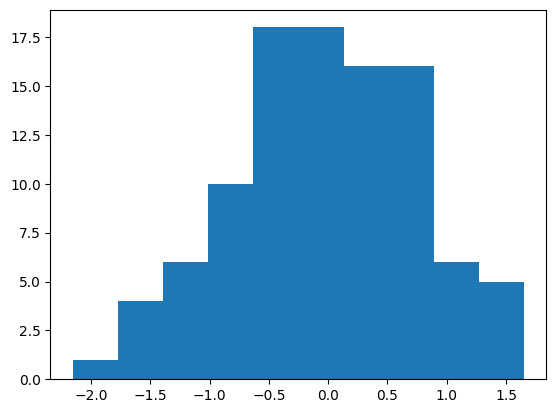

In [21]:
plt.hist(data["y_pred"] - data["y"])

## Obteniendo la recta de regresion
* y = a + b *x
* b = sum((xi - x_m) * (y_i - y_m))/sum((xi-x_m)^2)
* a = y_n - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean


(np.float64(1.3324777670547419), np.float64(7.56345823309725))

In [23]:
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])


In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(np.float64(4.977892125669321), 1.940419698816413)

El modelo lineal obtenido por regresion es: y = 5.0433555306097455 + 1.8913698432437176 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.506608,5.391634,5.962556,2.562888,0.325951,4.716819,1.793643,0.682060,5.960925
1,-0.353262,3.765233,4.328802,10.463001,0.317610,14.426513,6.402819,2.841719,4.292415
2,2.705562,9.009769,10.140568,6.641495,1.278706,2.091816,1.985907,1.885361,10.227818
3,-0.977296,2.015362,3.143138,19.539233,1.271878,30.781369,12.814846,5.335054,3.081528
4,4.586240,14.208315,13.713856,37.827398,0.244490,44.154125,21.620786,10.586970,13.877123


In [29]:
# Ahora calculamos la suma de los cuadrados para obtener el coeficiente de determinación R2
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)


In [30]:
SSR, SSD, SST

(2401.264193692035, 58.154439638001634, 2459.418633330037)

In [31]:
R2 = SSR / SST
R2

0.9763543957706535

Text(0.5, 1.0, 'Valor Actual vs Predicción')

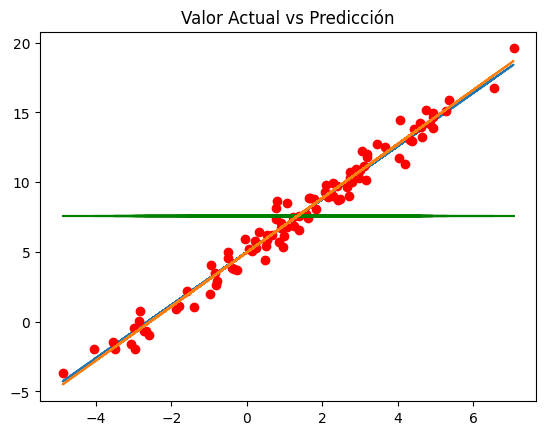

In [32]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"], data["y_pred"])

plt.plot(data["x"], data["y"] , 'ro')
plt.plot(data["x"], y_mean, 'g')

plt.plot(data["x"], data["y_model"])

plt.title("Valor Actual vs Predicción")

### Error estandar de los residuos (SRE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

np.float64(0.7703328172727445)

In [34]:
np.mean(data["y"])

np.float64(7.56345823309725)

In [35]:
RSE / np.mean(data["y"])

np.float64(0.1018492855426653)